In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit
import scipy.stats as stats

# Problem 1

# 1.

In [2]:
# First, define the formula to calculate the probability
def compute_pN(N, r, sigma, mu):
    uN = np.exp(mu/N + sigma * np.sqrt(1/N))
    dN = 1 / uN
    pN = (np.exp(r/N) - dN) / (uN - dN)
    return pN

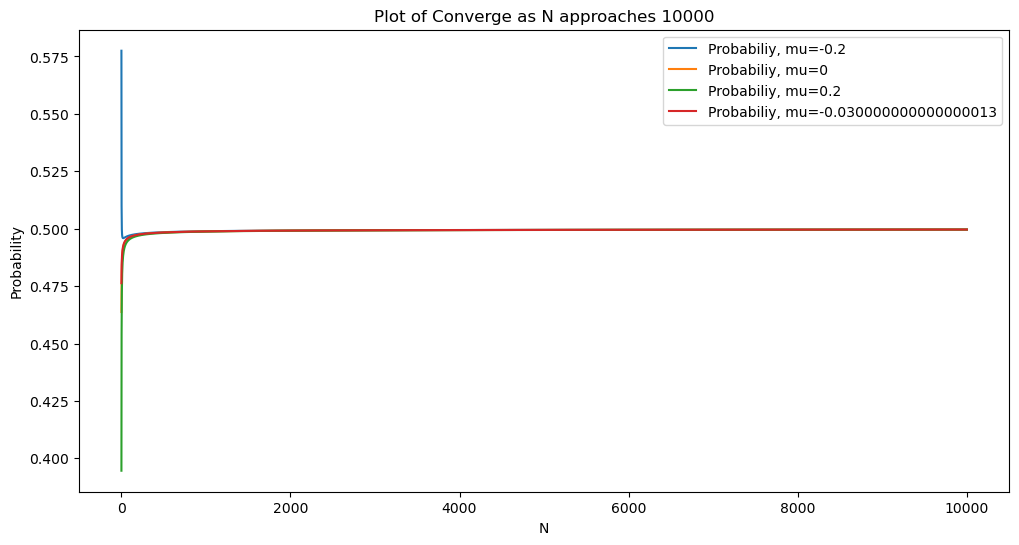

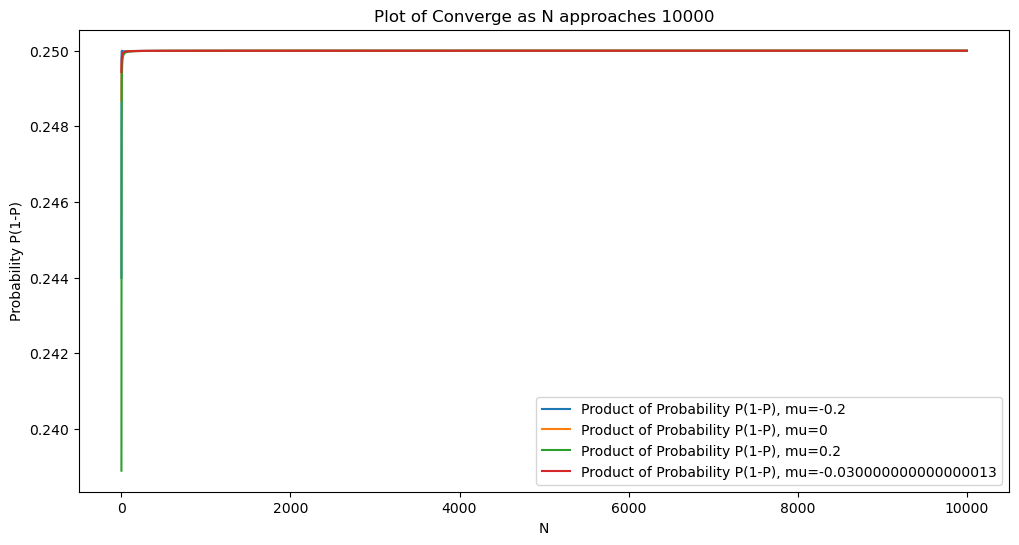

For μ = -0.2:
  Estimated limit of pN: 0.49963314192897124
  Estimated limit of pN(1 - pN): 0.24999986541515573
For μ = 0:
  Estimated limit of pN: 0.49962500122916453
  Estimated limit of pN(1 - pN): 0.24999985937592187
For μ = 0.2:
  Estimated limit of pN: 0.4996168917804245
  Estimated limit of pN(1 - pN): 0.24999985322809212
For μ = -0.030000000000000013:
  Estimated limit of pN: 0.4996262203304219
  Estimated limit of pN(1 - pN): 0.24999986028875862


In [3]:
# This function will be used to calculate the convergence when N goes to a very large number
# Define the parameters before calculation
r = 0.05
sigma = 0.4
S0 = 100
N = 10000
N_vector = [n for n in range(1,N+1)]
mu_values = [-0.2,0,0.2,r-(sigma**2)/2]


# Plugging in the parameters
plt.figure(figsize=(12, 6))
for mu in mu_values:
    pN_calculated = np.array([compute_pN(n,r,sigma,mu) for n in N_vector])
    plt.plot(N_vector,pN_calculated,label=f'Probabiliy, mu={mu}')

plt.xlabel('N')
plt.ylabel('Probability')
plt.title('Plot of Converge as N approaches 10000')
plt.legend()
plt.show()   

plt.figure(figsize=(12, 6))
for mu in mu_values:
    pN_product = np.array([compute_pN(n,r,sigma,mu)*(1-compute_pN(n,r,sigma,mu)) for n in N_vector])
    plt.plot(N_vector,pN_product,label=f'Product of Probability P(1-P), mu={mu}')
plt.xlabel('N')
plt.ylabel('Probability P(1-P)')
plt.title('Plot of Converge as N approaches 10000')
plt.legend()
plt.show()  
for mu in mu_values:
    pN_calculated = np.array([compute_pN(n,r,sigma,mu) for n in N_vector])
    pN_product = np.array([compute_pN(n,r,sigma,mu)*(1-compute_pN(n,r,sigma,mu)) for n in N_vector])
    print(f'For \u03BC = {mu}:')
    print(f'  Estimated limit of pN: {pN_calculated[-1]}')
    print(f'  Estimated limit of pN(1 - pN): {pN_product[-1]}')
    

# 2.

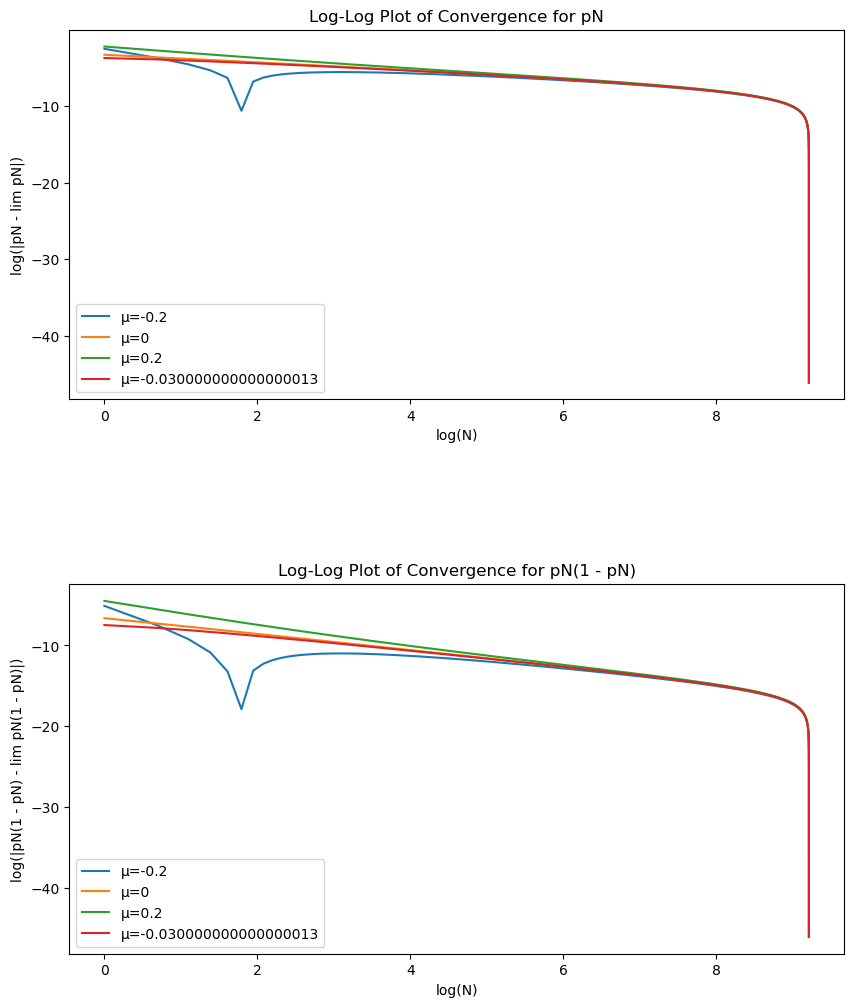

In [23]:
def power_law(x, c, k):
    return c * x**(-k)


k1_values = {}
k2_values = {}
C1_values = {}
C2_values = {}

fig, axs = plt.subplots(2, 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

for mu in mu_values:
    pN_values = np.array([compute_pN(n, r, sigma, mu) for n in N_vector])
    pN_limit = pN_values[-1]
    pN_product_values = pN_values * (1 - pN_values)
    pN_1_limit = pN_product_values[-1]

    diff_pN = np.abs(pN_values - pN_limit) + 1e-20  # To Avoid log(0)
    diff_pN_product = np.abs(pN_product_values - pN_1_limit) + 1e-20

   
    popt_pN, _ = curve_fit(power_law, N_vector, diff_pN, maxfev=5000)
    popt_pN_product, _ = curve_fit(power_law, N_vector, diff_pN_product, maxfev=5000)

    C1, k1 = popt_pN
    C2, k2 = popt_pN_product

    k1_values[mu] = k1
    C1_values[mu] = C1
    k2_values[mu] = k2
    C2_values[mu] = C2

    axs[0].plot(np.log(N_vector), np.log(diff_pN), label=f'μ={mu}')
    axs[1].plot(np.log(N_vector), np.log(diff_pN_product), label=f'μ={mu}')

axs[0].set_xlabel('log(N)')
axs[0].set_ylabel('log(|pN - lim pN|)')
axs[0].set_title('Log-Log Plot of Convergence for pN')
axs[0].legend()

axs[1].set_xlabel('log(N)')
axs[1].set_ylabel('log(|pN(1 - pN) - lim pN(1 - pN)|)')
axs[1].set_title('Log-Log Plot of Convergence for pN(1 - pN)')
axs[1].legend()

plt.show()


In [25]:
for mu in mu_values:
    print(f'For μ = {mu}:')
    print(f'  Estimated k1: {k1_values[mu]:.2f}, C1: {C1_values[mu]:.2f}')
    print(f'  Estimated k2: {k2_values[mu]:.2f}, C2: {C2_values[mu]:.2f}')

For μ = -0.2:
  Estimated k1: 0.72, C1: 0.05
  Estimated k2: 3.52, C2: 0.01
For μ = 0:
  Estimated k1: 0.58, C1: 0.04
  Estimated k2: 0.98, C2: 0.00
For μ = 0.2:
  Estimated k1: 0.71, C1: 0.10
  Estimated k2: 1.49, C2: 0.01
For μ = -0.030000000000000013:
  Estimated k1: 0.55, C1: 0.03
  Estimated k2: 0.81, C2: 0.00


# 3.

In [41]:
sample_size = 1000000
N=10000
def compute_expected_sd_sN(N, r, sigma, mu, S0):
    uN = np.exp(mu/N + sigma * np.sqrt(1/N))  
    dN = 1 / uN  
    pN = (np.exp(r/N) - dN) / (uN - dN)  

    num_up_moves = np.random.binomial(N, pN, sample_size)  
    SN = S0 * (uN ** num_up_moves) * (dN ** (N - num_up_moves))  
    ln_SN_over_S0 = np.log(SN / S0)  

    expected_ln_SN = np.mean(ln_SN_over_S0)
    std_ln_SN = np.std(ln_SN_over_S0)

    return expected_ln_SN, std_ln_SN, ln_SN_over_S0

In [42]:
print(N)

10000



For μ = -0.2:
  Monte Carlo Expected Value: -0.028835, Theoretical: -0.030000
  Monte Carlo Std Dev: 0.397982, Theoretical: 0.400000


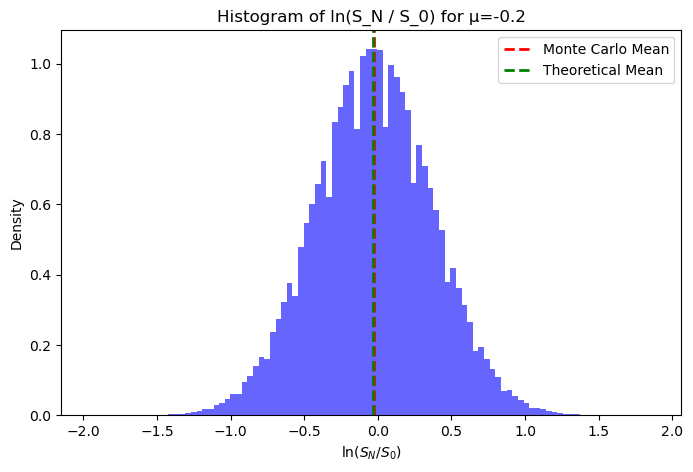


For μ = 0:
  Monte Carlo Expected Value: -0.030062, Theoretical: -0.030000
  Monte Carlo Std Dev: 0.400468, Theoretical: 0.400000


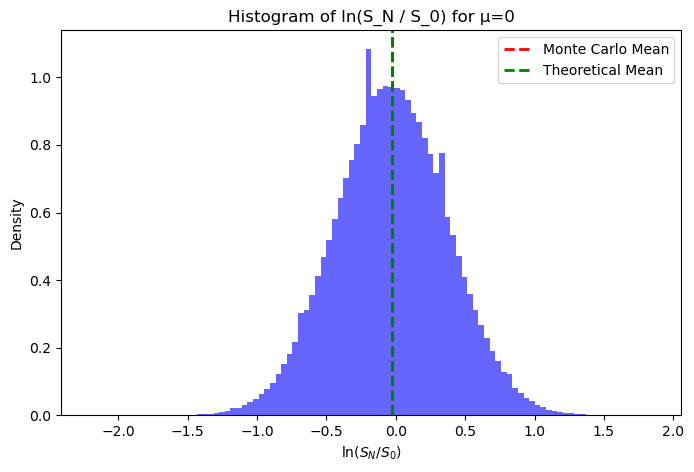


For μ = 0.2:
  Monte Carlo Expected Value: -0.030965, Theoretical: -0.030000
  Monte Carlo Std Dev: 0.402065, Theoretical: 0.400000


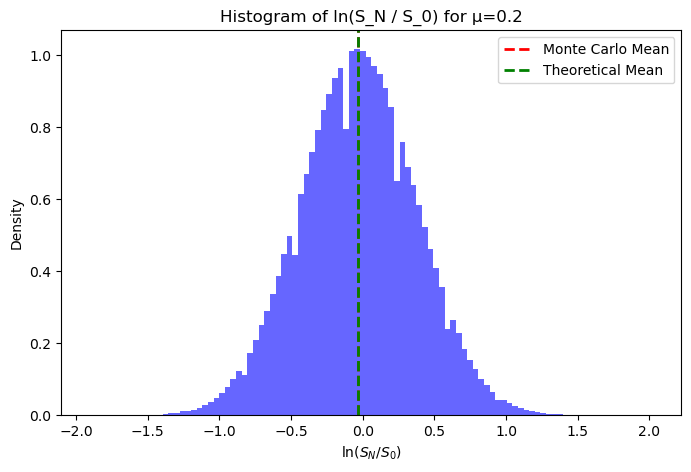


For μ = -0.030000000000000013:
  Monte Carlo Expected Value: -0.029925, Theoretical: -0.030000
  Monte Carlo Std Dev: 0.399713, Theoretical: 0.400000


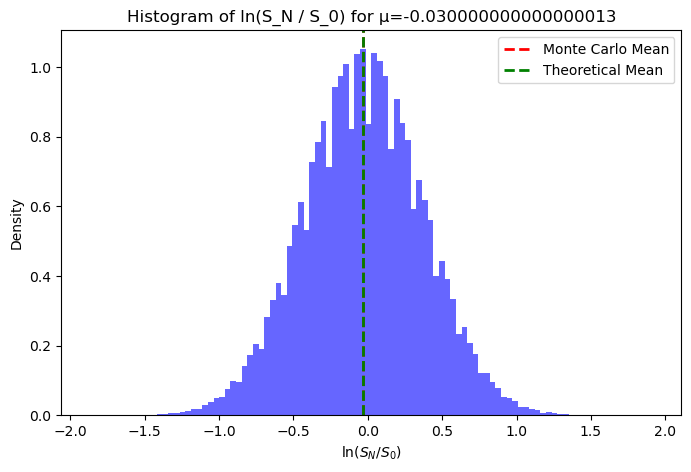

In [43]:
results = {}
for mu in mu_values:
    expected_ln_SN, std_ln_SN, ln_SN_over_S0 = compute_expected_sd_sN(N, r, sigma, mu, S0)
    results[mu] = (expected_ln_SN, std_ln_SN, ln_SN_over_S0)

    # Compare with theoretical values
    theoretical_mean = r - (sigma**2) / 2
    theoretical_std = sigma

    print(f"\nFor μ = {mu}:")
    print(f"  Monte Carlo Expected Value: {expected_ln_SN:.6f}, Theoretical: {theoretical_mean:.6f}")
    print(f"  Monte Carlo Std Dev: {std_ln_SN:.6f}, Theoretical: {theoretical_std:.6f}")
    plt.figure(figsize=(8, 5))
    plt.hist(ln_SN_over_S0, bins=100, density=True, alpha=0.6, color='b')
    plt.xlabel(r'$\ln(S_N / S_0)$')
    plt.ylabel('Density')
    plt.title(f'Histogram of ln(S_N / S_0) for μ={mu}')
    plt.axvline(expected_ln_SN, color='r', linestyle='dashed', linewidth=2, label="Monte Carlo Mean")
    plt.axvline(theoretical_mean, color='g', linestyle='dashed', linewidth=2, label="Theoretical Mean")
    plt.legend()
    plt.show()

In [45]:
print(sigma)

0.4


# 5.

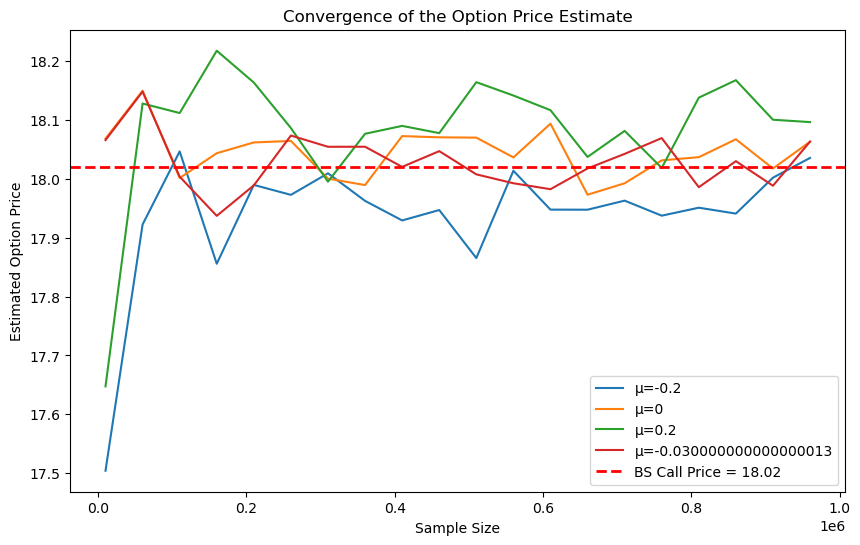

In [49]:
K = 100 
T = 1  
N=10000
max_sample_size = 1000000

prices_convergence = pd.DataFrame(columns=['mu', 'size', 'price'])

for mu in mu_values:
    for size in range(10000, max_sample_size + 1, 50000):
        uN = np.exp(mu / N + sigma * np.sqrt(1 / N))
        dN = 1 / uN
        pN = (np.exp(r / N) - dN) / (uN - dN)
        S_N = np.full(size, S0, dtype=np.float64)

        num_up_moves = np.random.binomial(N, pN, size)
        down_num = N - num_up_moves
        S_N *= uN ** num_up_moves * dN ** down_num 
        payoff = np.maximum(S_N - K, 0)
        price = np.mean(payoff) * np.exp(-r * T)
        prices_convergence.loc[len(prices_convergence)] = [mu, size, price]

plt.figure(figsize=(10, 6))
for mu in mu_values:
    prices_mu = prices_convergence[prices_convergence['mu'] == mu]
    plt.plot(prices_mu['size'], prices_mu['price'], label=f'μ={mu}')
bs_call_price = 18.02
plt.axhline(y=bs_call_price, color='red', linestyle='dashed', linewidth=2, label='BS Call Price = 18.02')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Option Price')
plt.title('Convergence of the Option Price Estimate')
plt.legend()
plt.show()

# Problem 2

In [8]:
N = 1000  
num_trials = 10000  

means = np.zeros(num_trials)
std_devs = np.zeros(num_trials)

for i in range(num_trials):
    X = np.random.uniform(0, 1, N)
    Y = np.random.uniform(0, 1, N)
    Z = (X**2 + Y**2 <= 1).astype(int)
    
    means[i] = np.mean(Z)
    std_devs[i] = np.std(Z, ddof=1)

lower_bounds = means - 1.96 * std_devs / np.sqrt(N)
upper_bounds = means + 1.96 * std_devs / np.sqrt(N)

true_mean = np.pi / 4

coverage = np.sum((lower_bounds <= true_mean) & (true_mean <= upper_bounds)) / num_trials

print(f"Proportion of times the true mean falls within the confidence interval: {coverage:.4f}")


Proportion of times the true mean falls within the confidence interval: 0.9504


# Problem 3

# 1.

In [9]:
def pareto_sample(alpha, N=1_000_000):
    U = np.random.uniform(0, 1, N)
    return (U ** (-1 / alpha))

def running_statistics(X):
    N = len(X)
    cumulative_sum = np.cumsum(X)
    cumulative_sq_sum = np.cumsum(X**2)
    n = np.arange(1, N + 1)

    mean_estimate = cumulative_sum / n
    
    variance_estimate = np.zeros(N)
    variance_estimate[1:] = (cumulative_sq_sum[1:] - (cumulative_sum[1:] ** 2) / n[1:]) / (n[1:] - 1)
    variance_estimate[0] = np.nan  

    std_estimate = np.sqrt(variance_estimate)
    
    return mean_estimate, std_estimate


In [10]:
def true_pareto_stats(alpha):
    if alpha > 1:
        mean = alpha / (alpha - 1)
    else:
        mean = np.inf  
    if alpha > 2:
        variance = (alpha / ((alpha - 1) ** 2 * (alpha - 2)))
    else:
        variance = np.inf  
    std_dev = np.sqrt(variance) if variance != np.inf else np.inf
    return mean, std_dev

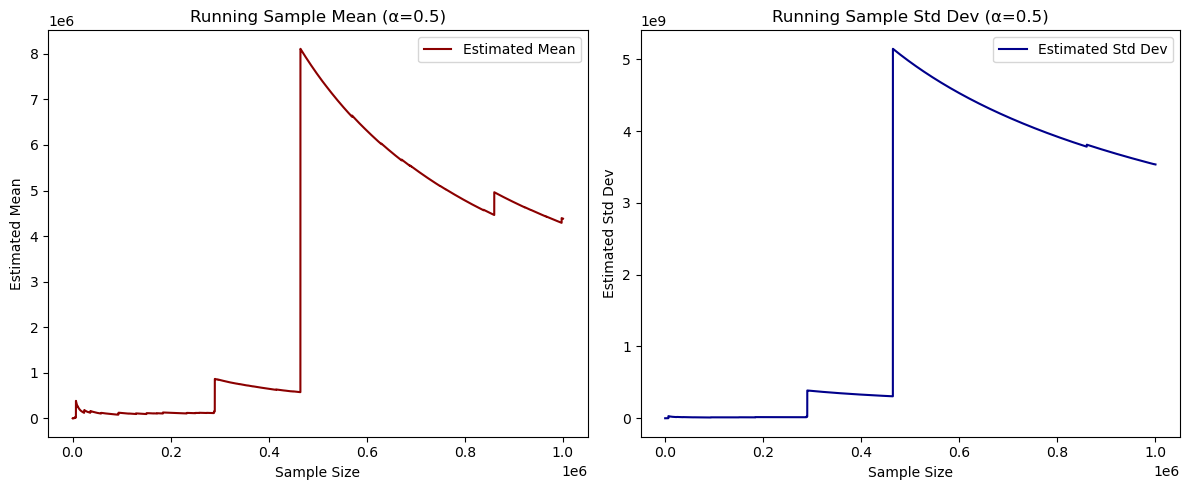

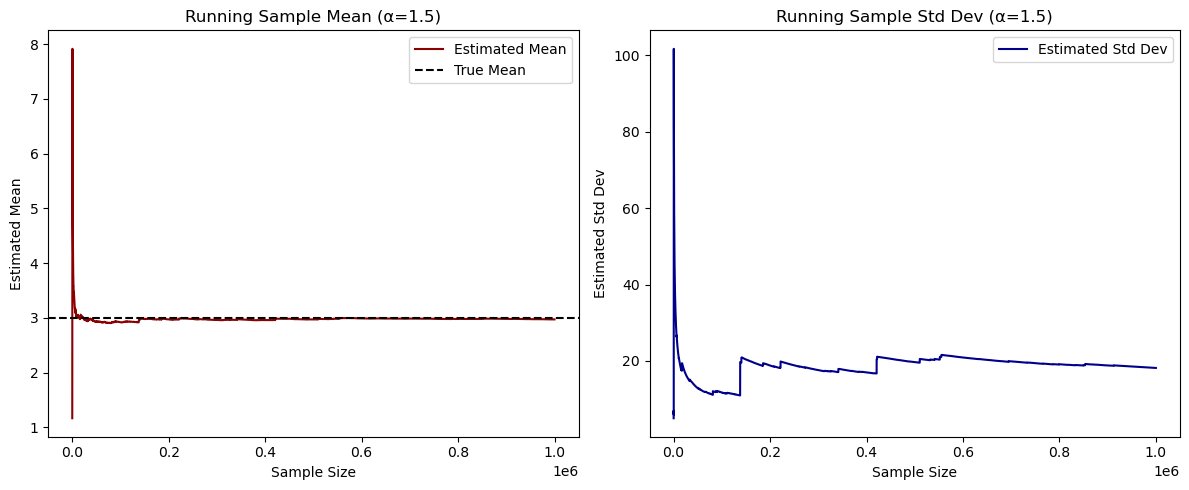

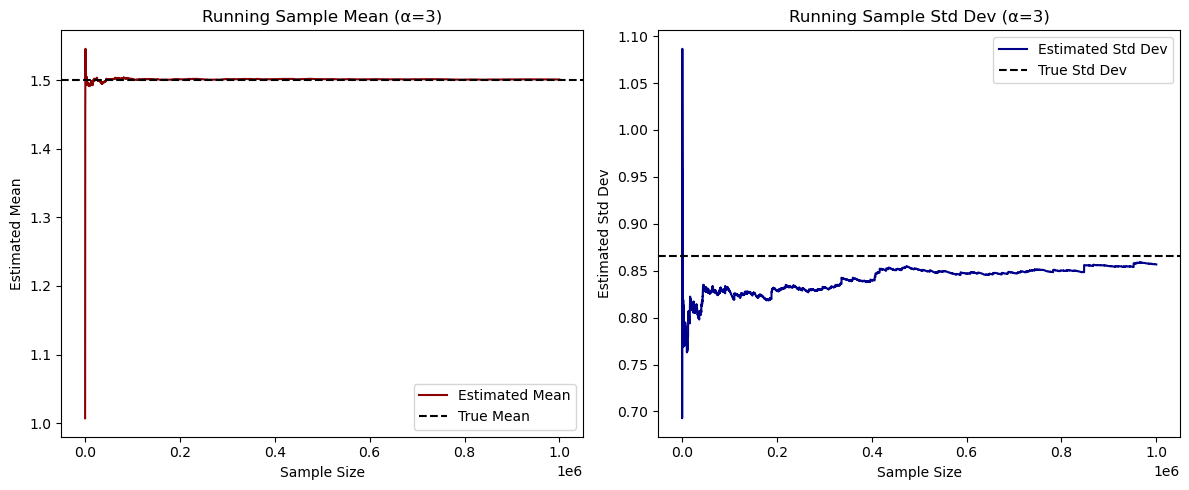

In [11]:
alpha_values = [0.5, 1.5, 3]
N = 1000000
indices = np.linspace(0, N - 1, 10000, dtype=int)  

for alpha in alpha_values:
    X = pareto_sample(alpha, N)
    mean_series, std_series = running_statistics(X)
    true_mean, true_std = true_pareto_stats(alpha)

    plt.figure(figsize=(12, 5))

    
    plt.subplot(1, 2, 1)
    plt.plot(indices + 1, mean_series[indices], color='darkred', label="Estimated Mean")
    if true_mean != np.inf:
        plt.axhline(true_mean, color='black', linestyle='--', label="True Mean")
    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Mean')
    plt.title(f'Running Sample Mean (α={alpha})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(indices + 1, std_series[indices], color='darkblue', label="Estimated Std Dev")
    if true_std != np.inf:
        plt.axhline(true_std, color='black', linestyle='--', label="True Std Dev")
    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Std Dev')
    plt.title(f'Running Sample Std Dev (α={alpha})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 2.

In [12]:
num_repetitions = 10  

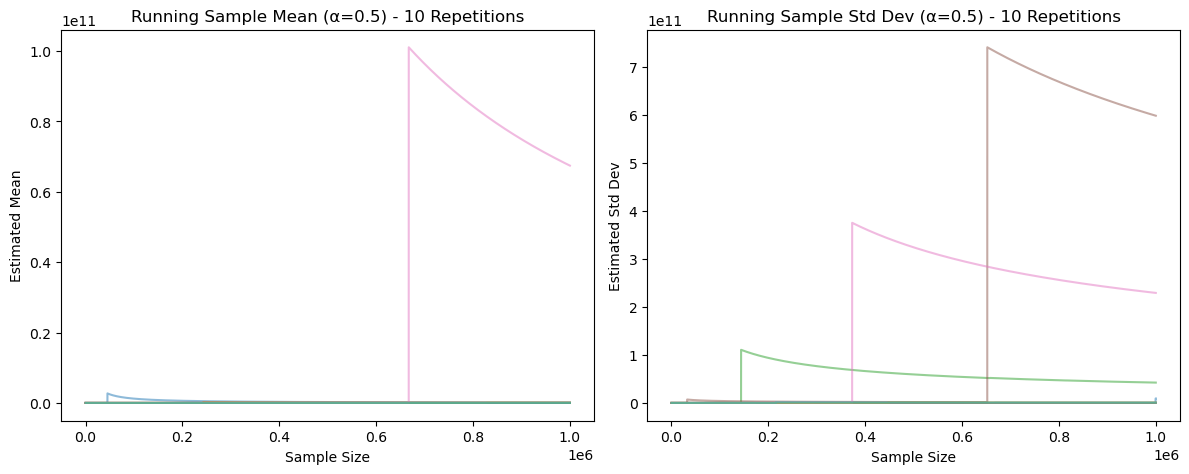

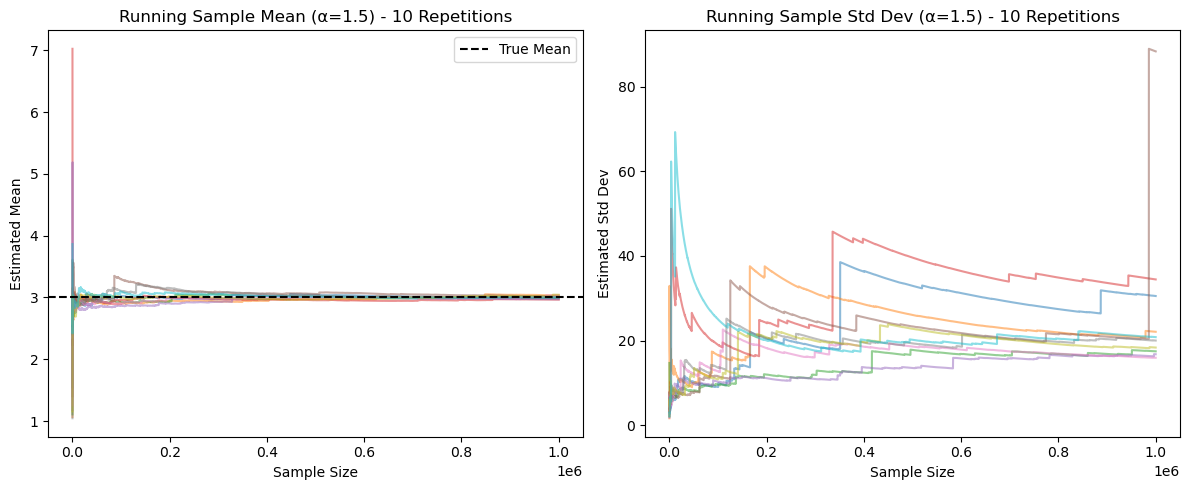

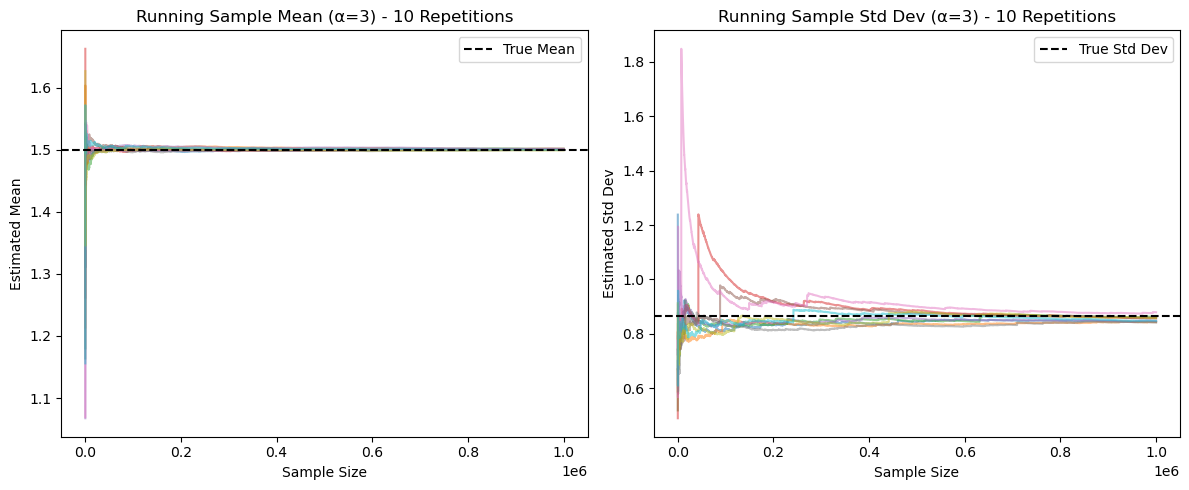

In [13]:
for alpha in alpha_values:
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for _ in range(num_repetitions):
        X = pareto_sample(alpha, N)
        mean_series, std_series = running_statistics(X)
        plt.plot(indices + 1, mean_series[indices], alpha=0.5)  

    true_mean, true_std = true_pareto_stats(alpha)
    mean_legend_labels = []

    
    
    if true_mean != np.inf:
        plt.axhline(true_mean, color='black', linestyle='--', label="True Mean")
        mean_legend_labels.append("True Mean")

    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Mean')
    plt.title(f'Running Sample Mean (α={alpha}) - 10 Repetitions')

    if mean_legend_labels:
        plt.legend()

    plt.subplot(1, 2, 2)
    for _ in range(num_repetitions):
        X = pareto_sample(alpha, N)
        mean_series, std_series = running_statistics(X)
        plt.plot(indices + 1, std_series[indices], alpha=0.5)  

    std_legend_labels = []
    
    if true_std != np.inf:
        plt.axhline(true_std, color='black', linestyle='--', label="True Std Dev")
        std_legend_labels.append("True Std Dev")

    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Std Dev')
    plt.title(f'Running Sample Std Dev (α={alpha}) - 10 Repetitions')

    if std_legend_labels:
        plt.legend()

    plt.tight_layout()
    plt.show()

# Problem 4

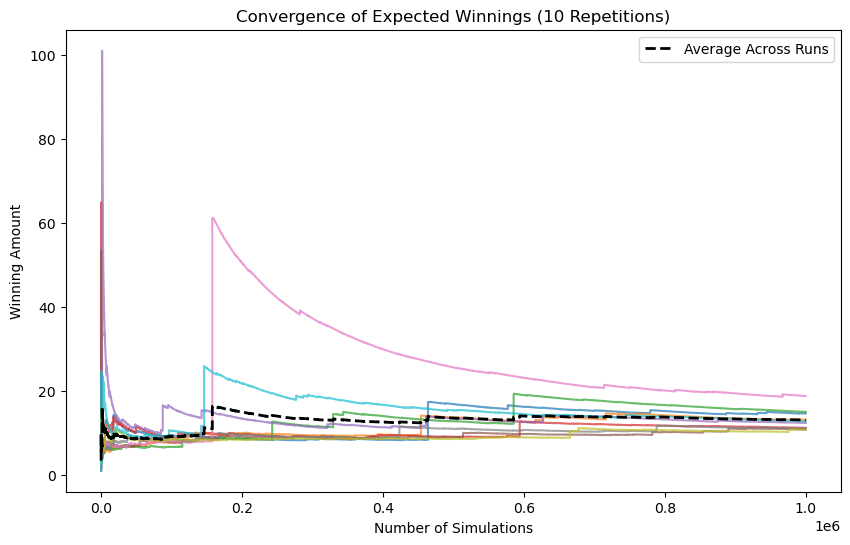

Run 1: Estimated Expected Winnings: $10.46
Run 2: Estimated Expected Winnings: $13.07
Run 3: Estimated Expected Winnings: $17.02
Run 4: Estimated Expected Winnings: $18.25
Run 5: Estimated Expected Winnings: $17.65
Run 6: Estimated Expected Winnings: $14.98
Run 7: Estimated Expected Winnings: $9.41
Run 8: Estimated Expected Winnings: $9.72
Run 9: Estimated Expected Winnings: $10.75
Run 10: Estimated Expected Winnings: $11.12

Overall Estimated Expected Winnings (Averaged Across 10 Runs): $13.25


In [73]:
N = 1000000  
num_repetitions = 10

all_running_means = []

plt.figure(figsize=(10, 6))

for _ in range(num_repetitions):
    coin_flip = np.random.geometric(p=0.5, size=N)
    winnings = 2 ** (coin_flip - 1)
    
    running_mean = np.cumsum(winnings) / np.arange(1, N + 1)
    all_running_means.append(running_mean)
    
    plt.plot(running_mean, alpha=0.7)

average_running_mean = np.mean(all_running_means, axis=0)

plt.plot(average_running_mean, color='black', linestyle='--', linewidth=2, label="Average Across Runs")

plt.xlabel('Number of Simulations')
plt.ylabel('Winning Amount')
plt.title('Convergence of Expected Winnings (10 Repetitions)')
plt.legend() 
plt.show()

final_winnings = [np.mean(2 ** (np.random.geometric(p=0.5, size=N) - 1)) for _ in range(num_repetitions)]

for i, winnings in enumerate(final_winnings, 1):
    print(f"Run {i}: Estimated Expected Winnings: ${winnings:.2f}")

overall_expected_winnings = np.mean(final_winnings)
print(f"\nOverall Estimated Expected Winnings (Averaged Across 10 Runs): ${overall_expected_winnings:.2f}")

# Problem 6

   N (Simulations)  Estimated Mean Hits  Estimated Variance
0               10             1.300000            1.788889
1              100             0.940000            0.925657
2             1000             1.046000            1.040925
3            10000             1.000700            1.006800
4           100000             1.000920            1.004789
5          1000000             0.999135            0.999225


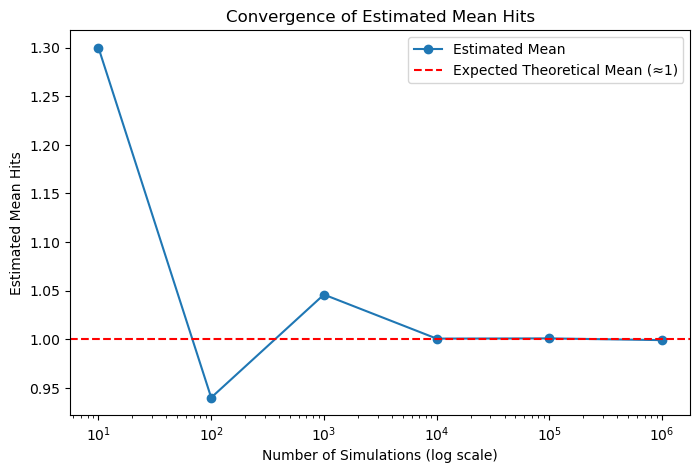

In [17]:
def count_hits():
    deck = np.random.permutation(100) + 1  
    return np.sum(deck == np.arange(1, 101))  

N_values = [10**k for k in range(1, 7)]
results = []

for N in N_values:
    hits = np.array([count_hits() for _ in range(N)])
    mean_hits = np.mean(hits)
    var_hits = np.var(hits, ddof=1)
    results.append([N, mean_hits, var_hits])

df_results = pd.DataFrame(results, columns=["N (Simulations)", "Estimated Mean Hits", "Estimated Variance"])
print(df_results)

plt.figure(figsize=(8, 5))
plt.plot(N_values, [row[1] for row in results], marker='o', linestyle='-', label="Estimated Mean")
plt.axhline(y=1, color='r', linestyle='--', label="Expected Theoretical Mean (≈1)")
plt.xscale("log")
plt.xlabel("Number of Simulations (log scale)")
plt.ylabel("Estimated Mean Hits")
plt.title("Convergence of Estimated Mean Hits")
plt.legend()
plt.show()
